## Clustering and Classification with Python

#### Student no : 21627648
#### Student name : Tuna Aybar Taş



## Table of Content

[Purpose](#purpose)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling for Clustering](#clusteringmodel)  
[Clustering results](#clustering)    
[Modeling for Classification](#classificationmodel)  
[Evaluation](#evaluation)  
[References](#references)   


## Purpose <a class="anchor" id="purpose"></a>

In this assignment I will be trying to find out bean species from the data extracted from images of various haricot beans. The dataset wil be used for both clustering and classification. 
In first part I will seperate haricot bean samples into clusters with an unsupervised machine learning algorithm and then the data will be seperated into training and test sets to classification and supervised machine learning algorithms will be used in this phase.

## Data Understanding<a class="anchor" id="data_understanding"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

original_data = pd.read_csv("data.csv")

In order to take a glance at the data we can use **shape** attribute which informs us about row and column counts

In [2]:
original_data.shape

(13611, 17)

The dataset consists of **17** columns including information about **13611** samples with more than 1.8 MB memory usage.

As we can see except "Class" column, the dataset contains numeric data types which mostly float whereas "Area" and "ConvexArea" columns provided as int. So we've three different data types **float,int,object** ordered by majority.

In [3]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
original_data.describe(include="all")

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DERMASON
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3546
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063,NaN
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366,NaN
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,NaN
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703,NaN
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386,NaN
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883,NaN


With help of **isnull** function we can also see the dataset doesn't contain any null values.


In [5]:
original_data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Now lets examine minimum, maximum, mean and median values for numerical type columns by using **agg()** function 

In [6]:
for column in original_data.columns:
    if original_data[column].dtype != object:
        print(original_data.agg({column:["min","max","mean","median"]}))

                 Area
min      20420.000000
max     254616.000000
mean     53048.284549
median   44652.000000
          Perimeter
min      524.736000
max     1985.370000
mean     855.283459
median   794.941000
        MajorAxisLength
min          183.601165
max          738.860154
mean         320.141867
median       296.883367
        MinorAxisLength
min          122.512653
max          460.198497
mean         202.270714
median       192.431733
        AspectRation
min         1.024868
max         2.430306
mean        1.583242
median      1.551124
        Eccentricity
min         0.218951
max         0.911423
mean        0.750895
median      0.764441
           ConvexArea
min      20684.000000
max     263261.000000
mean     53768.200206
median   45178.000000
        EquivDiameter
min        161.243764
max        569.374358
mean       253.064220
median     238.438026
          Extent
min     0.555315
max     0.866195
mean    0.749733
median  0.759859
        Solidity
min     0.919246
m

Since applying numerical statistics on 'Class' column doesn't make sense ,in order to get more information about categorical data we can use 'value_counts' function which applies grouping on category and reflects the counts of it.

In [7]:
label_counts = original_data["Class"].value_counts() # Stored it to use following sections
label_counts

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

If we examine the target feature the class of haricot bean species line up as dermason,sira,seker, 
horoz, cali, barbunya, bombay from most common to least common.
A simple visualization using pie chart makes this observed easier.

<AxesSubplot:title={'center':'Class'}, ylabel='Class'>

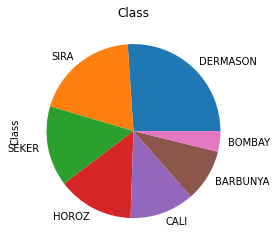

In [8]:
original_data["Class"].value_counts().plot(kind='pie',title="Class")

## Data Preparation<a class="anchor" id="data_preparation"></a>

From the previous section we've seen there isn't any column that has null values which means there is no need to drop or convert them to any value.

In [9]:
original_data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

The dataset contains target feature as object which is non-numerical type. In order to perform machine learning algorithms on the data we have to represent all columns as numeric values. To handle that I will use One-Hot Encoding which is a technique to convert non-numeric types to numeric types. The easiest way to implement it is using **get_dummies()** function presented in pandas. 

In [10]:
original_data = pd.get_dummies(original_data,columns=["Class"])
original_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_BARBUNYA,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,...,0.003147,0.834222,0.998724,0,0,0,0,0,1,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,...,0.003564,0.909851,0.998430,0,0,0,0,0,1,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,...,0.003048,0.825871,0.999066,0,0,0,0,0,1,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,...,0.003215,0.861794,0.994199,0,0,0,0,0,1,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,...,0.003665,0.941900,0.999166,0,0,0,0,0,1,0


Note that we could have done that by simply assigning some numerical values to the same column but with this operation we didn't weight a value but added more columns as downside.

Before passing data to a machine learning model, also we should check out the correlatians and negative correlations. If we find such features we can eliminate some of them as they are redundant.


<AxesSubplot:>

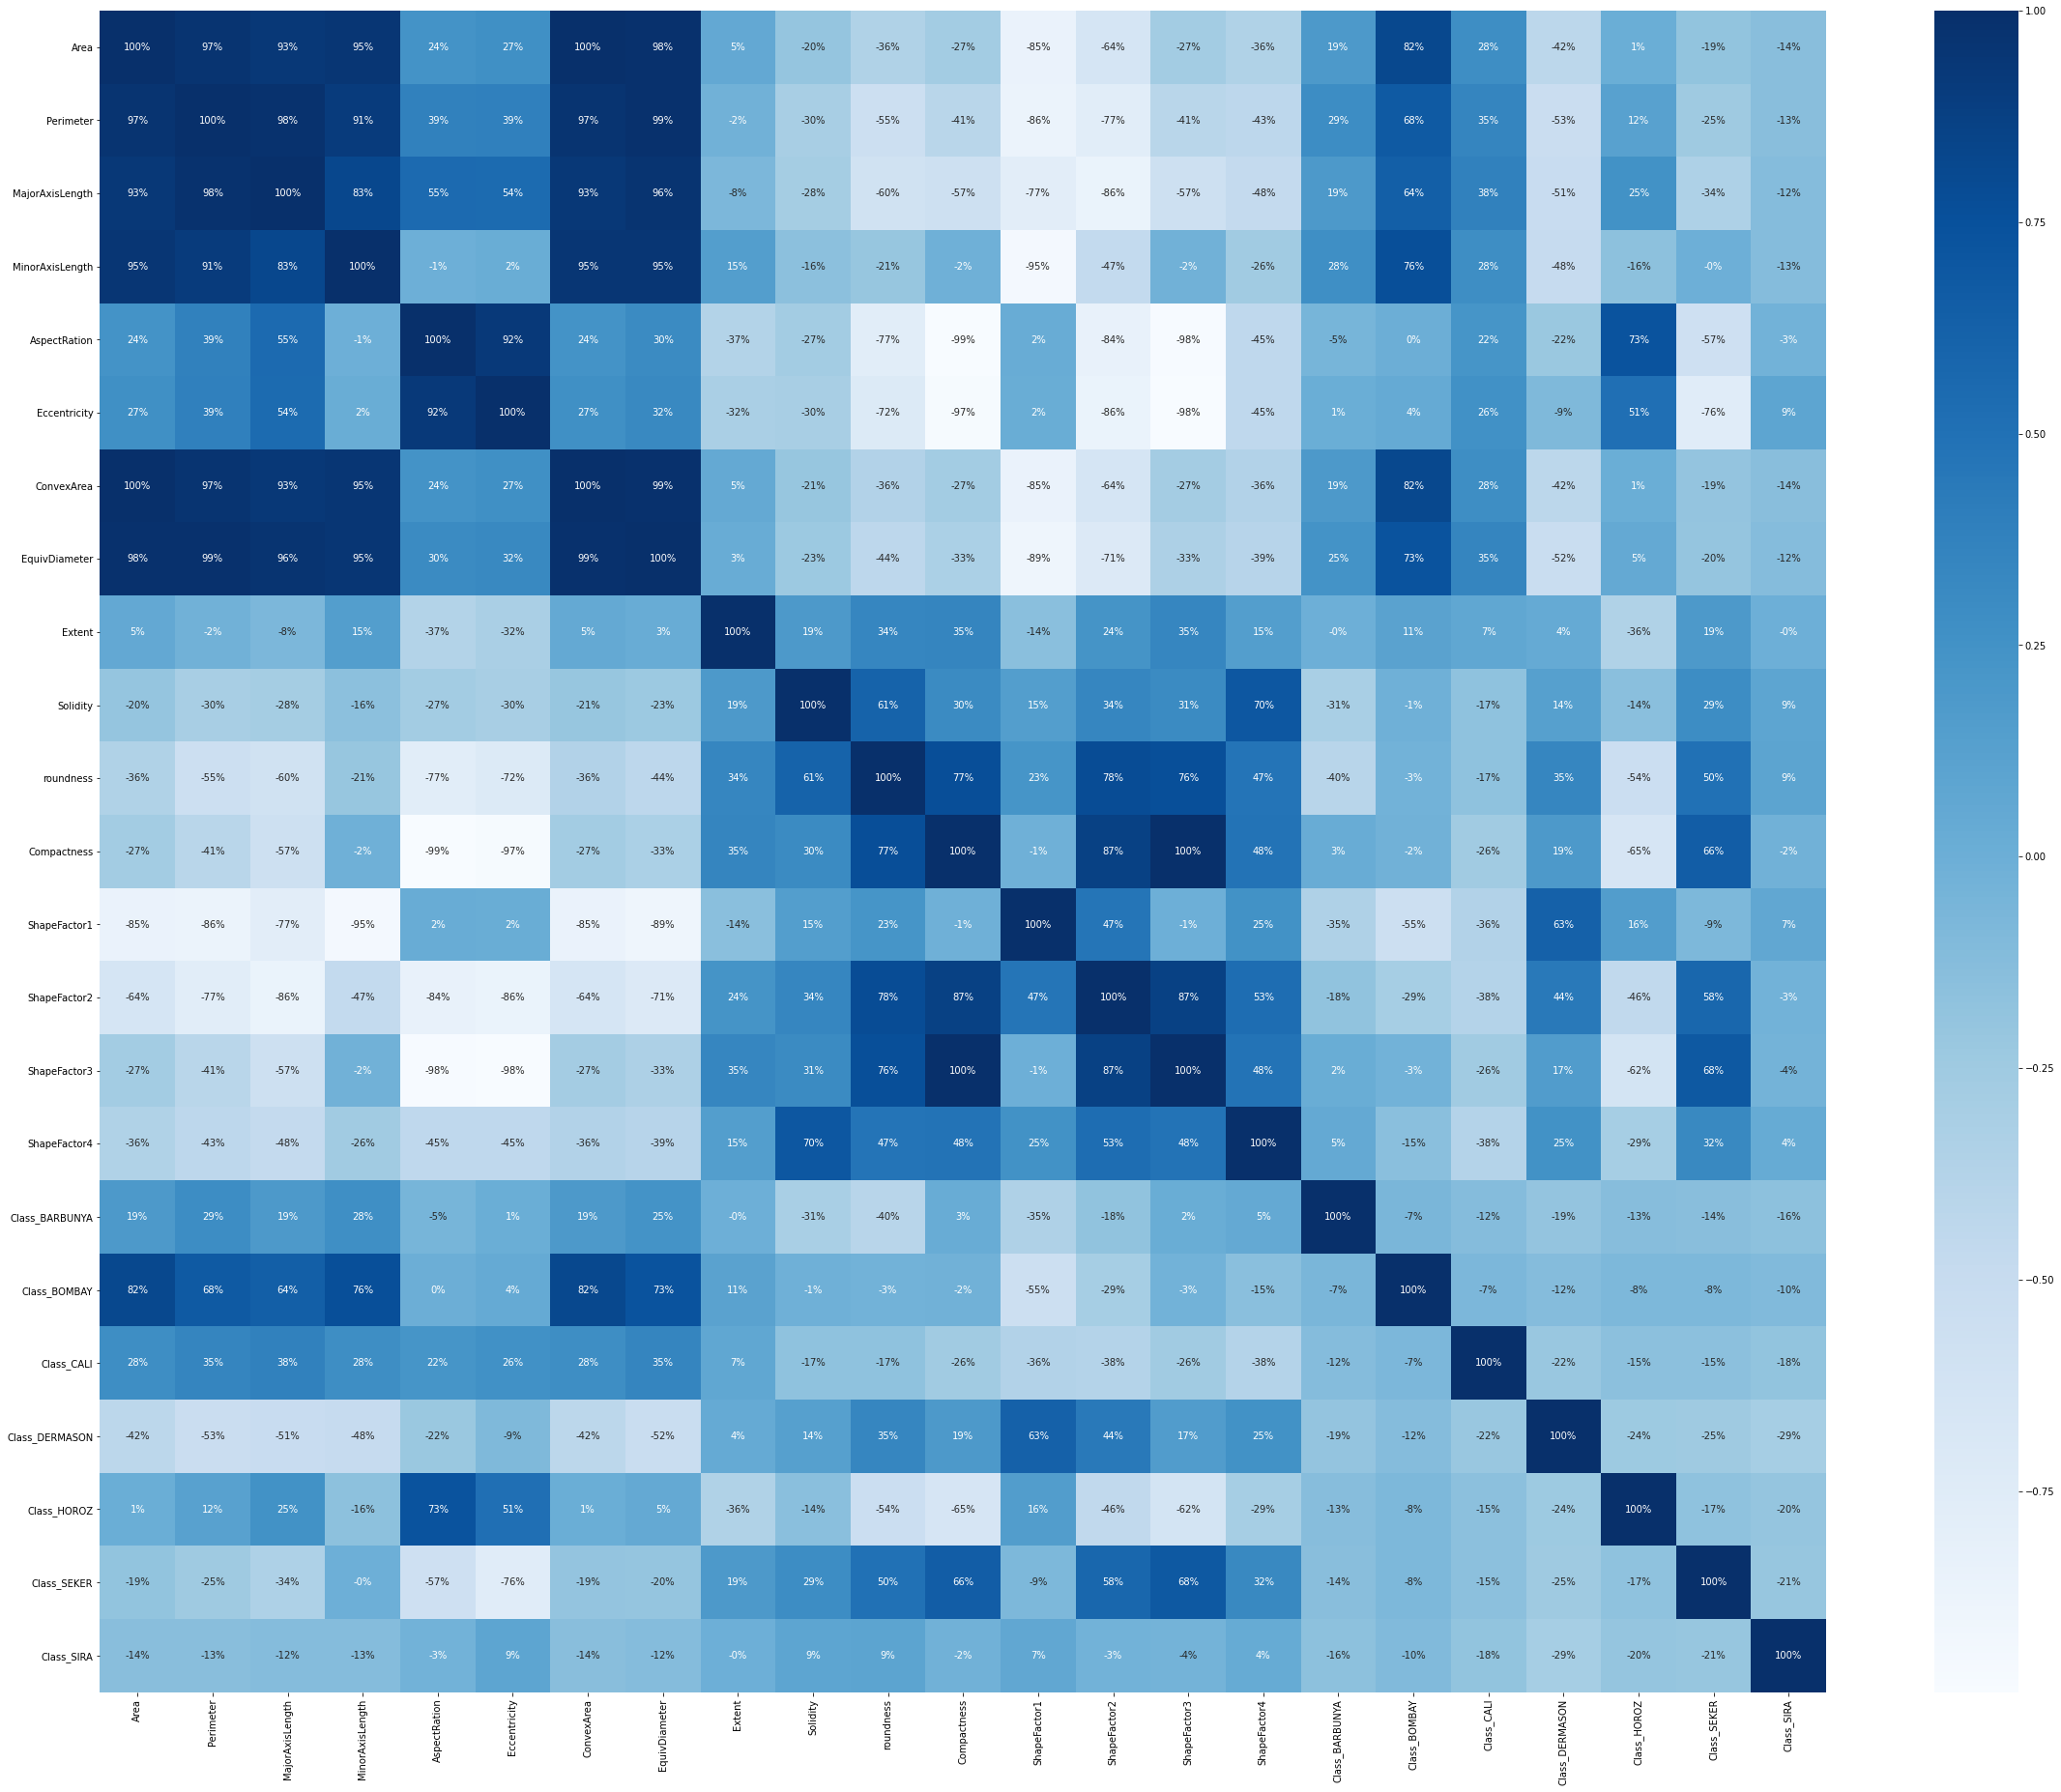

In [11]:
plt.figure(figsize=(40,32))
sns.heatmap(original_data.corr(), annot=True, fmt='.0%',cmap="Blues" )


By interpreting the heatmap, we obtain the following results about the data,
<br><br>
**1)** Area and Convex Area features are a hundred percent related which means basicly we can eliminate one of them. <br>
**2)** Area and Equivalent diameter %98 correlated. So again we can remove one of them.<br>
**3)** Compactness and Aspect Ratio also reverse correlated -%98 which implies one of them can be removed <br>
**4)** Major Axis Length and Minor Axis Length also can be removed since they are highly correlated with few features and we have another feature Aspect Ratio which defines the relationship between them. <br>

As result I removed Convex Area, Equivalent diameter, Compactness, Major Axis , Minor Axis features from the dataframe.

In [12]:
original_data.drop(['ConvexArea','EquivDiameter','Compactness','MajorAxisLength','MinorAxisLength'], axis = 1, inplace= True)

In [13]:
normalized_data = original_data.copy() # Copying original frame to normalized frame to not to touch original one.

The range of variables at different measured scales can delude machine learning algorithms such as K-Means. The reason under the hood is that clustering algorithms mostly use distance-based techniques. So if one feature's scale is much higher than others, the model probably reflect that difference while clustering. To handle that we use standardization methods which prevents happening of that sort of action.

To observe that situation lets check out distribution of the first feature which is 'Area'. With help of the below histogram its obvious that the distribution of ares is far away from normal distribution which is the distribtion type we expecting from data as usual.

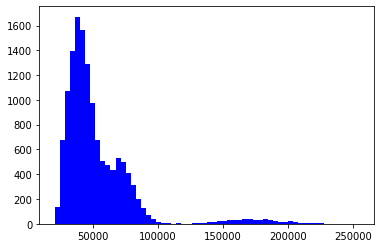

In [14]:
plt.hist(original_data['Area'], bins=60,facecolor='blue', align='mid')
plt.show()

To overcome this situation I will use min-max standardization which transforms data into 0 -1 range.
Now lets see how min-max standardization affects the distribution on 'Area' feature.
Since this anomaly can be seen on each numeric feature I don't feel the need of showing all other columns.


Since in first part we will perform clustering operation I splitted the data as features and target.

In [15]:
min_max_scaler = MinMaxScaler()
standardized_data = min_max_scaler.fit_transform(normalized_data)
normalized_data = pd.DataFrame(standardized_data,columns = normalized_data.columns)

Lets observe how min-max standardization affected our data as comparison.

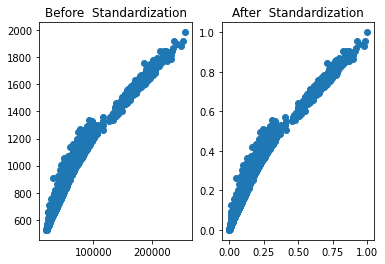

In [16]:
fig, axes = plt.subplots(1,2)

rng = np.random.RandomState(0)
axes[0].scatter(original_data.values[:,0], original_data.values[:,1])
axes[0].set_title("Before  Standardization")

axes[1].scatter(normalized_data.values[:,0], normalized_data.values[:,1])
axes[1].set_title("After  Standardization")
plt.show()


As seen above our values normalized as their range varies from 0 to 1

## Modeling for Clustering <a class="anchor" id="clusteringmodel"></a>

In order to cluster the samples, I will use K-Means Clustering algorithm. The algorithm starts from a group of centroids which are randomly selected with count of provided clusters (k).<br> <br>They are used as beginning point for each cluster. The distance between each sample to the centroids are found and samples are grouped with respect to minimum distance. Then the model performs repetitive calculations to optimize positions of each centroid untill they get stabilized.<br><br>
The reason choosing this model is its simplicity and efficiency. Since the number of iterations can be explicitly stated, it can be relatively fast.<br> <br>
I set some parameters to tune the model. **n_init** parameter specifies how many times the algorithm will be runned and **tol** parameter which controls the tolerance with regard to the changes in the cluster sum squared error to manage convergence problems.


**a) Cluster Original Dataset**

Lets cluster the original dataset.Since the KMeans algorithm needs a cluster count, we should provide it one. To do that I will use **elbow method** which implies what should be the cluster count.

Note that I pretended like I hadn't known the actual cluster count this is why I tested the **elbow method** on following parts.

Just before that in order to extract our labels I hold a list to that will be used following steps.

In [17]:
feature_list = [i for i in original_data.columns if 'Class' not in i]
classification_encoding_labels = [i for i in original_data if 'Class' in i]

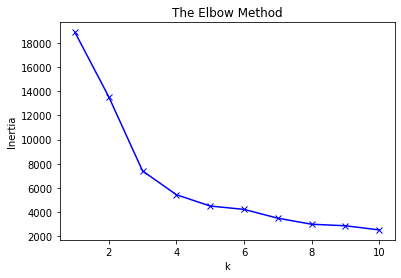

In [18]:
inertia = []

for k in range(1,11):
    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(original_data[feature_list])
    inertia.append(sum(np.min(cdist(original_data[feature_list], kmeans.cluster_centers_, 'euclidean'), axis=1)) / original_data[feature_list].shape[0])
    
plt.plot(range(1,11), inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()


Above graph shows how k variable affects the inertia. As a result we should say that maybe 3 would be sufficient to make predictions.
But since in this assignment I am more interested in finding more accurate results as first concern I selected 7 which provides more accurate results.

In [19]:
kmeans = KMeans(n_clusters = 7,n_init =10,tol=1e-04)

kmeans.fit(original_data[feature_list])

cluster_label_original = kmeans.predict(original_data[feature_list])

clustered_data_original = original_data.drop(classification_encoding_labels, axis=1)

clustered_data_original['Cluster'] = cluster_label_original 

The center of clusters can be seen by following command

In [20]:
print(kmeans.cluster_centers_)

[[5.20176528e+04 8.85919635e+02 1.79176668e+00 8.11756516e-01
  7.27386724e-01 9.86533843e-01 8.35316557e-01 6.63049423e-03
  1.32764579e-03 5.68586627e-01 9.93807590e-01]
 [1.58403166e+05 1.51265484e+03 1.55594309e+00 7.60906940e-01
  7.74577820e-01 9.87417683e-01 8.69426013e-01 3.55418960e-03
  9.03568487e-04 6.41240268e-01 9.92557525e-01]
 [3.08305306e+04 6.50598913e+02 1.45068155e+00 7.10383593e-01
  7.56321387e-01 9.88164550e-01 9.13152144e-01 7.78637333e-03
  2.30768467e-03 6.93897810e-01 9.97053045e-01]
 [8.27812560e+04 1.12185430e+03 1.68519331e+00 7.98930396e-01
  7.56089202e-01 9.84517694e-01 8.26965973e-01 5.11823461e-03
  1.11051572e-03 5.92971814e-01 9.92124677e-01]
 [4.09889349e+04 7.54808107e+02 1.46819800e+00 7.06140817e-01
  7.55562166e-01 9.88827081e-01 9.05224629e-01 6.75666446e-03
  2.00290715e-03 6.92319170e-01 9.96568532e-01]
 [6.76339312e+04 1.02036148e+03 1.71802891e+00 8.01558175e-01
  7.44520053e-01 9.84187496e-01 8.17023037e-01 5.70924869e-03
  1.21019907e-03

**b) Cluster Normalized Dataset**

Before the beggining lets check if the elbow method indicates another k value by repreating process for normalized data.

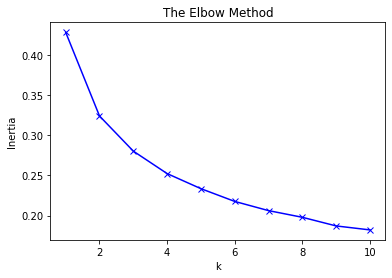

In [21]:
inertia = []

for k in range(1,11):
    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normalized_data[feature_list])
    inertia.append(sum(np.min(cdist(normalized_data[feature_list], kmeans.cluster_centers_, 'euclidean'), axis=1)) / normalized_data[feature_list].shape[0])
    
plt.plot(range(1,11), inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

This time we got smoother line as the data is normalized.Again I selected 7 because we are just experiencing how elbow method works. We already know we have 7 clusters.

In [22]:
kmeans = KMeans(n_clusters = 7,n_init =10,tol=1e-04)

kmeans.fit(normalized_data[feature_list])

cluster_label_normalized = kmeans.predict(normalized_data[feature_list])

clustered_data_normalized = normalized_data.drop(classification_encoding_labels, axis=1)

clustered_data_normalized['Cluster'] = cluster_label_normalized 


## Clustering results<a class="anchor" id="clustering"></a>

Note that since the K-Means algorithm chooses random centronoids with respect to random numeric labels (0,1,2,3,4,5,6 in this case since k = 7), I compared the results with respect to label counts. Each time the algorithm runs, the representing numbers will randomized per class.

**a) Clustering results with original dataset**

To compare our result with actual one, first lets see how clustering interpreted classes.

In [23]:
clustered_data_original["Cluster"].value_counts()

4    4212
2    3236
0    2571
5    1905
3    1167
1     308
6     212
Name: Cluster, dtype: int64

To represent it as visual we can use count plots

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


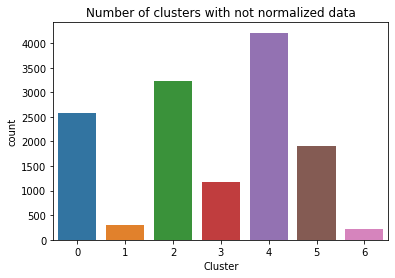

In [24]:
ax = sns.countplot(clustered_data_original["Cluster"]).set_title("Number of clusters with not normalized data") 

**b) Clustering results with normalized dataset**

In [25]:
clustered_data_normalized["Cluster"].value_counts()

2    3221
1    3096
3    2627
5    2003
6    1151
0     991
4     522
Name: Cluster, dtype: int64

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


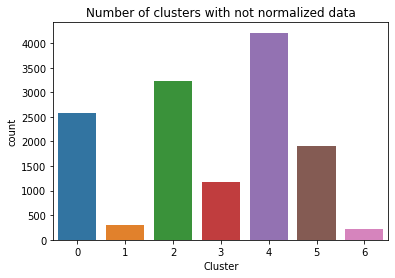

In [26]:
ax = sns.countplot(clustered_data_original["Cluster"]).set_title("Number of clusters with not normalized data") 

**c) Clustering Comparison**

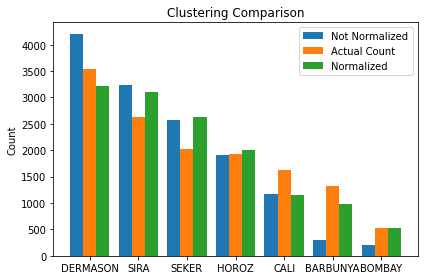

In [27]:
labels = list(dict(label_counts).keys())

clustered_data_original_list = list(clustered_data_original["Cluster"].value_counts())
clustered_data_normalized_list = list(clustered_data_normalized["Cluster"].value_counts())
actual_labels = list(label_counts)

x = np.arange(len(labels)) 

width = 0.27 

fig, ax = plt.subplots()
ax.bar(x-width, clustered_data_original_list, width, label='Not Normalized')
ax.bar(x, actual_labels, width, label='Actual Count')
ax.bar(x+width, clustered_data_normalized_list, width, label='Normalized')

ax.set_ylabel('Count')
ax.set_title('Clustering Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()

fig.tight_layout()

plt.show()

As seen above figure, the model trained with normalized data produced more accurate clustering. Especially while clustering "Barbunya" samples, the model trained with original data struggled obviously. For other bean species the situation isn't different than "Barbunya" and as a result we deduce that KMeans works better with normalized data.  


## Modeling for Classification <a class="anchor" id="classificationmodel"></a>

From the beginning, we should seperate our training and test data. Otherwise we probably encounter with overfitting problems. Overfitting is the situation that model adheres to training data much more than we want. It usually prevents model to make accurate predictions on both testing data and new data. 

**a) Split original data** 

In [28]:
X_original_data = original_data[feature_list]
y_original_data = original_data.drop(feature_list,axis=1)

X_original_data_train , X_original_data_test, y_original_data_train, y_original_data_test  = train_test_split(X_original_data,y_original_data,test_size = 0.2, random_state = 10)

**b) Split normalized data** 

Before splitting the data I applied min-max normalization just like I did on clustering section.

In [29]:
min_max_scaler = MinMaxScaler()
normalized_data_array = min_max_scaler.fit_transform(original_data)
normalized_data_clf = pd.DataFrame(normalized_data_array,columns = original_data.columns)

In [30]:
X_normalized_data = normalized_data_clf[feature_list]
y_normalized_data = normalized_data_clf.drop(feature_list,axis=1)

X_normalized_data_train , X_normalized_data_test, y_normalized_data_train, y_normalized_data_test = train_test_split(X_normalized_data,y_normalized_data,test_size = 0.2, random_state = 0)

**c) Choosing Model** 

Choosing the right model for problem and data can be tough. Since the operation we will be performing is classification there are several algorithms. In order to keep things simple I will start from **KNN** and will switch one of the ensemble classifiers if the need arises. <br><br>
KNN is a machine learning algorithm mostly used for classification. The most obvious reason for me to choose it is its simplicity. It simply classifies the samples based on how their neighboor resides. So the new samples are classified according to earlier ones. <br><br>
The key factor to reach success with KNN is determining the K value. This value represents the number of nearest neighboors the algorithm being used to classify a new sample. For instance K = 1 then the new sample will be classified according to only the nearest neighboor.


Since the K value should be determined for each dataset uniquely, I will try to find best value for K by running the model several times with different K values.

In [31]:
original_data_accuracies = []

for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_original_data_train, y_original_data_train)
    predictions = knn.predict(X_original_data_test)
    score = metrics.accuracy_score(y_original_data_test, predictions)
    original_data_accuracies.append(score)

Above we've tried several k values up to 50. Now lets visualize our accuracies by plotting them to figure out which k value to choose.

Text(0, 0.5, 'Accuracy')

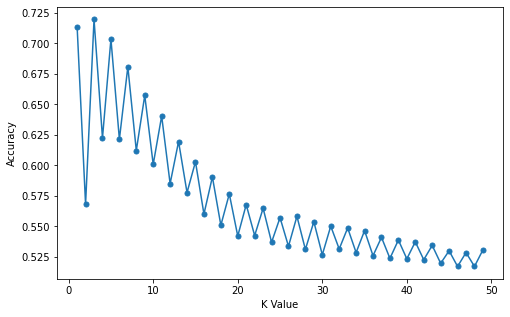

In [32]:
plt.figure(figsize=(8,5))
plt.plot(range(1,50),original_data_accuracies, marker='o', markersize=5)
plt.xlabel('K Value')
plt.ylabel('Accuracy')

So if we evaluate above graph it can be said that k = 3 gives us the most accurate results on our predictions.

**d) Classification of original data** 

Lets classify the original data with k = 3 and see the results.

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_original_data_train, y_original_data_train)
predictions = knn.predict(X_original_data_test)
score = metrics.accuracy_score(y_original_data_test, predictions)

print(score)

0.7197943444730077


We got approximately %72 accuracy. Now lets compare it with the results we got with normalized data.

**e) Classification of normalized data** 

In [34]:
normalized_accuracies = []

for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_normalized_data_train, y_normalized_data_train)
    predictions = knn.predict(X_normalized_data_test)
    score = metrics.accuracy_score(y_normalized_data_test, predictions)
    normalized_accuracies.append(score)

Text(0, 0.5, 'Accuracy')

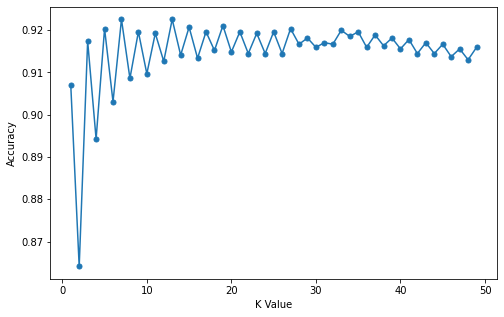

In [35]:
plt.figure(figsize=(8,5))
plt.plot(range(1,50),normalized_accuracies, marker='o', markersize=5)
plt.xlabel('K Value')
plt.ylabel('Accuracy')

According to above graph 7 would be a reasonable choice since it has highest accuracy.

In [36]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_normalized_data_train, y_normalized_data_train)
predictions = knn.predict(X_normalized_data_test)
score = metrics.accuracy_score(y_normalized_data_test, predictions)
print(score)

0.9225119353654058


This time with normalized data we got around %92 accuracy which is higher that the result we got with not normalized data.
So it proves that our model works better with normalized data. 

## Evaluation<a class="anchor" id="evaluation"></a>

We have already observed the importance of normalization by comparing the accuracies obtained from original and normalized datasets. The reason behind that situation is machine learning algorithms works better on stricted range of values.


**a)Evaluation of Clustering** 

In [37]:
# Get integer representations of real clusters instead of One Hot Encoding to view of plots
original_data['Original_Clusters'] = list(original_data[list("Class_"+i for i in labels)].values.argmax(axis=1))

Text(0.5, 1.0, 'Actual')

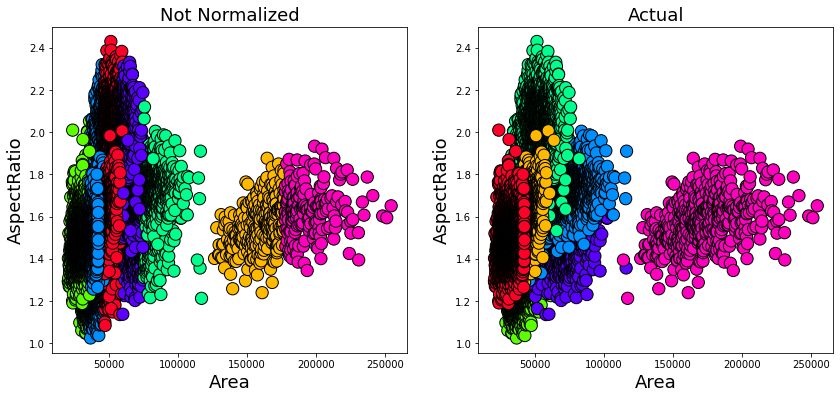

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(original_data['Area'],original_data['AspectRation'], c=clustered_data_original['Cluster'], cmap='gist_rainbow', edgecolor='k', s=150)
axes[1].scatter(original_data['Area'],original_data['AspectRation'], c=original_data['Original_Clusters'], cmap='gist_rainbow', edgecolor='k', s=150)
axes[0].set_xlabel('Area', fontsize=18)
axes[0].set_ylabel('AspectRatio', fontsize=18)
axes[1].set_xlabel('Area', fontsize=18)
axes[1].set_ylabel('AspectRatio', fontsize=18)
axes[0].set_title('Not Normalized', fontsize=18)
axes[1].set_title('Actual', fontsize=18)

Text(0.5, 1.0, 'Actual')

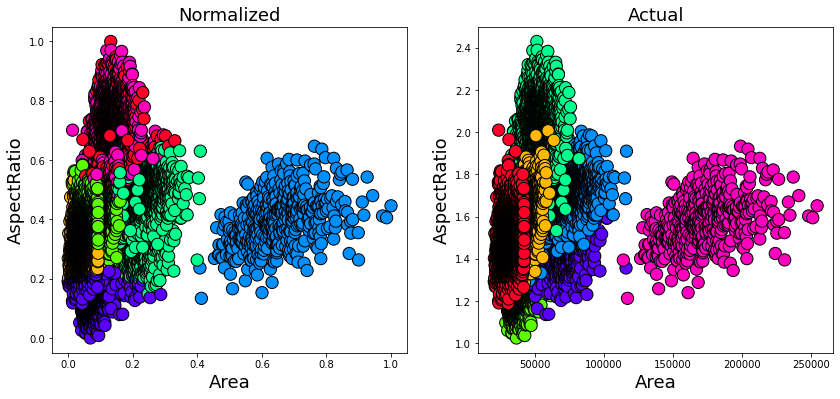

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(normalized_data['Area'],normalized_data['AspectRation'], c=clustered_data_normalized['Cluster'], cmap='gist_rainbow', edgecolor='k', s=150)
axes[1].scatter(original_data['Area'],original_data['AspectRation'], c=original_data['Original_Clusters'], cmap='gist_rainbow', edgecolor='k', s=150)
axes[0].set_xlabel('Area', fontsize=18)
axes[0].set_ylabel('AspectRatio', fontsize=18)
axes[1].set_xlabel('Area', fontsize=18)
axes[1].set_ylabel('AspectRatio', fontsize=18)
axes[0].set_title('Normalized', fontsize=18)
axes[1].set_title('Actual', fontsize=18)

As we can see above graphs the clustering we have done with normalized data reveal more accurate results. Especially if you take a glance at blue and yellow clusters on clustering with original data, its a fact that they are actually in the same cluster on actual data.


**b)Evaluation of Classification** 

We've alredy obtained accuracies of classification of original data and normalized data as %72 and %92 respectively. To further discuss about it I repeated the process and interpreted the results on confusion matrix

First start with original data which is not normalized.

In [40]:
knn_original_data = KNeighborsClassifier(n_neighbors=3)
knn_original_data.fit(X_original_data_train, y_original_data_train)
predictions_original_data = knn_original_data.predict(X_original_data_test)
score = metrics.accuracy_score(y_original_data_test, predictions_original_data)

print(score)

0.7197943444730077


Now lets check out confusion matrix of it.


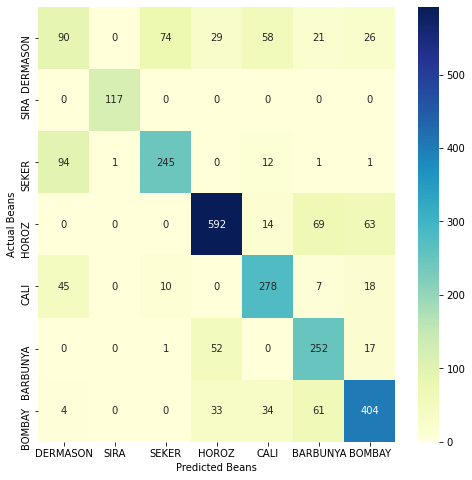

In [41]:
confusion_matrix_original_data = confusion_matrix(predictions_original_data.argmax(axis=1), y_original_data_test.values.argmax(axis=1))

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix_original_data, annot=True, fmt='d',cmap="YlGnBu",
            xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Beans')
plt.xlabel('Predicted Beans')
plt.show()

So the confusion matrix of classification with original data shows us  <br>90+117+245+592+278+252+404 = **1978** samples classified successfully out of **2723** test samples. 
If we look at the accuracy 1978 / 2723 is approximately **%72** which we get as score value.

In [42]:
clf_report_original_data = classification_report(y_original_data_test, knn_original_data.predict(X_original_data_test),target_names=labels)
print(clf_report_original_data)

              precision    recall  f1-score   support

    DERMASON       0.45      0.31      0.37       233
        SIRA       1.00      0.99      1.00       118
       SEKER       0.69      0.74      0.72       330
       HOROZ       0.80      0.84      0.82       706
        CALI       0.78      0.70      0.74       396
    BARBUNYA       0.78      0.61      0.69       411
      BOMBAY       0.75      0.76      0.76       529

   micro avg       0.76      0.72      0.74      2723
   macro avg       0.75      0.71      0.73      2723
weighted avg       0.75      0.72      0.73      2723
 samples avg       0.72      0.72      0.72      2723



c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The comparison between classification reports of classification with both original and normalized data will be done after normalized data classification on following steps

In [43]:
knn_normalized_data = KNeighborsClassifier(n_neighbors=7)
knn_normalized_data.fit(X_normalized_data_train, y_normalized_data_train)
predictions_normalized_data = knn_normalized_data.predict(X_normalized_data_test)
score = metrics.accuracy_score(y_normalized_data_test, predictions_normalized_data)

print(score)

0.9225119353654058


Now lets check out the confusion matrix of normalized data

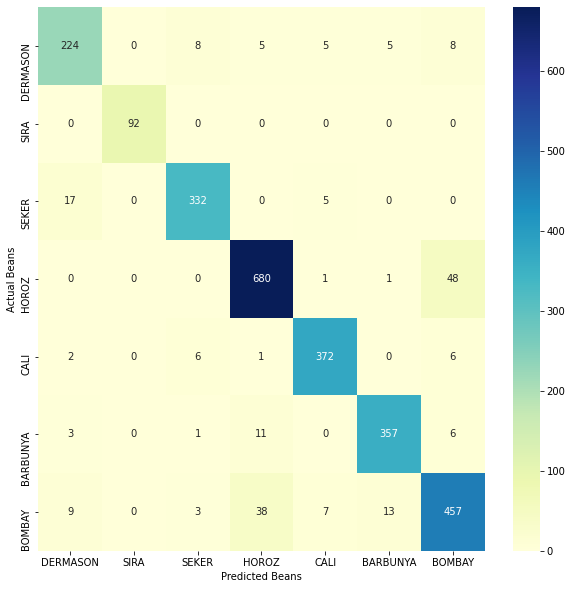

In [44]:
confusion_matrix_normalized_data = confusion_matrix(predictions_normalized_data.argmax(axis=1), y_normalized_data_test.values.argmax(axis=1))
confusion_matrix_normalized_data

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix_normalized_data, annot=True, fmt='d',cmap="YlGnBu",
            xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Beans')
plt.xlabel('Predicted Beans')
plt.show()

The confusion matrix of classification with normalized data shows us <br>
224 + 92 + 332 + 680 + 372 + 357 + 457 = <b>2514</b>  samples classified successfully out of **2723** test samples.<br>
If we look at the accuracy 2514 / 2723 is approximately **%92** which we get as score value.

In [45]:
clf_report_normalized_data = classification_report(y_normalized_data_test, knn_normalized_data.predict(X_normalized_data_test),target_names=labels)
print(clf_report_normalized_data)

              precision    recall  f1-score   support

    DERMASON       0.97      0.87      0.92       255
        SIRA       1.00      1.00      1.00        92
       SEKER       0.94      0.95      0.94       350
       HOROZ       0.93      0.93      0.93       735
        CALI       0.96      0.95      0.96       390
    BARBUNYA       0.94      0.95      0.95       376
      BOMBAY       0.87      0.87      0.87       525

   micro avg       0.93      0.92      0.93      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.93      0.92      0.93      2723
 samples avg       0.92      0.92      0.92      2723



c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Precision** measures the exactness of model. So in other way its the percentage of positive classified samples to all instances. <br>
**Recall** is the measurement of models completeness. Completeness implies that ability of model to correctly classify all positive instances. <br>

If we look macro averages of classification reports of original and normalized data which basicly the average of precisions of each class, the macro average implies that the normalized data performed better on KNN since we got **0.75** on original data and **0.94** on normalized data. As a result the model trained with normalized data classified positive samples more accurate.

Observing macro averages of recall again the model trained with normalized data performed better on test since we got **0.93** recall average whereas with original data the recall average is **0.71** 

Lastly if we examine the **f-1 score** which is weighted harmonic mean of precision and recall, the model trained with original data got **0.73** whereas the model trained with normalized data got **0.94** which implies the model works better with normalized data

Above classification results obviously indicate that the normalized data performed better and produced more accurate results.

## References<a class="anchor" id="references"></a>

https://matplotlib.org/ <br>
https://pandas.pydata.org/docs/user_guide/index.html#user-guide<br>
https://seaborn.pydata.org/generated/seaborn.heatmap.html<br>
https://scikit-learn.org/stable/getting_started.html#fitting-and-predicting-estimator-basics<br>
https://scikit-learn.org/stable/getting_started.html#model-evaluation<br>
https://scikit-learn.org/stable/getting_started.html#transformers-and-pre-processors<br>
https://scikit-learn.org/stable/modules/multiclass.html<br>
https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html<br>
https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html<br>
https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826<br>
https://towardsdatascience.com/tagged/k-means<br>
https://towardsdatascience.com/machine-learning-with-python-classification-complete-tutorial-d2c99dc524ec<br>
https://stackabuse.com/classification-in-python-with-scikit-learn-and-pandas/<br>
https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f<br>
https://realpython.com/k-means-clustering-python/<br>

List all the sources you used during your work.
This includes jupyter notebooks you found on Internet.
Remeber, your work may not be an original one. However, this document must be genuine. Copy and paste kind of deliveries will be punished badly.


**Disclaimer!** <font color='grey'>This notebook was prepared by Tuna Aybar Tas  as an assigment for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>